Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings

%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
# YOUR CODE HERE
    x_arr = numpy.empty(N+1)
    x_arr[0] = x0
    for i in range(1, N+1):
        x_arr[i] = g(x_arr[i-1])
    return x_arr
        
# raise NotImplementedError()

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

YOUR ANSWER HERE
$$Analysis:$$
$$ g(x) = 1 + x - \frac{x^2}{M}$$
Fixed point condition: $g(x)= x$
$$ 1 + x - \frac{x^2}{M} = x$$
$$ 1 - \frac{x^2}{M}= 0$$
$$ \frac{x^2}{M} = 1$$
$$x=\sqrt{M}$$
Since $x = g(x)$  at $x=\sqrt{M}$ therefore  $x=\sqrt{M}$  is a fixed point of $g(x)$

$$ g^\prime(x) = 1 - \frac{2x}{M}$$
$$
g(x) = 1 + x - \frac{x^2}{M} \quad\mathrm{with}\quad x^* \approx \sqrt{M}
$$
 
$$|g^\prime(x^*)| = |1 - \frac{2\sqrt{M}}{M}| $$

$$|g^\prime(x^*)| = |1 - \frac{2}{\sqrt{M}}| $$

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}$$ 

If $|g^\prime(x^*)| < 1$
$$|1 - \frac{2}{\sqrt{M}}| < 1$$
If $M > 1$ then $|g^\prime(x^*)| < 1 $

So if $|g'(x^*)| \leq K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k|$$

Thus, if M < 1 then $|g^\prime(x^*)|$ < 1 and g(x) has fixed point which is unique and it converges to x*.

M = 3, x0 = 2 It takes N = 19 to reduce the relative error to machine precision.
- N iterations:  19
- Nth relative error:  1.2819751242557095e-16
- Machine epsilon:  2.220446049250313e-16

N iterations:  19
Nth relative error:  1.2819751242557095e-16
Machine epsilon:  2.220446049250313e-16


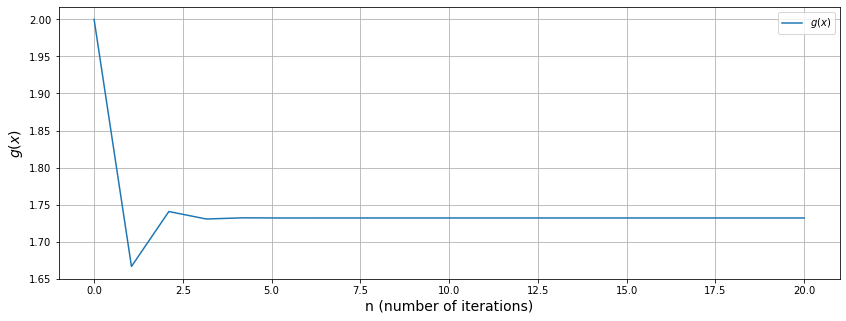

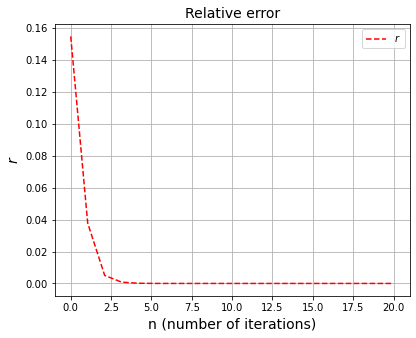

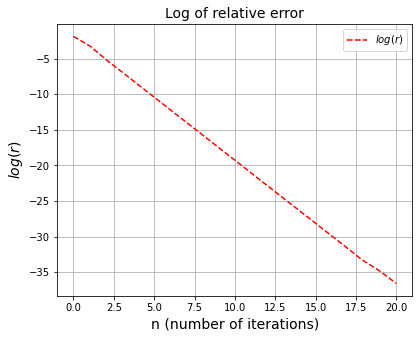

In [5]:
# Place plotting code here if needed

# YOUR CODE HERE
def get_relataive_err(f, F):
    if type(f) == numpy.ndarray:
        e = numpy.empty(f.size)
        r = numpy.empty(f.size)
        for i in range(f.size):
            e[i] = numpy.abs(f[i] - F[i])
            r[i] = e[i]/numpy.abs(f[i])
    else:
        e = numpy.abs(F-f)
        r = e/numpy.abs(f)
    return r
    
def fixed_point(g, x0, M):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *M* (float) - Approxiation Number
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
        N: (int) - number of terms in iteration
    """
    f = numpy.sqrt(M)
    output = []
    output.append(x0)
    rel_err = 0
    rel_err_list = []
    rel_err_list.append(get_relataive_err(f, x0))
    x_k = x0
    N = 0
    epsilon = numpy.finfo(float).eps
    cond = True
    while cond:
        x_k = g(x_k)
        output.append(x_k)
        N += 1
        rel_err = get_relataive_err(f, x_k)
        rel_err_list.append(rel_err)
        if rel_err < epsilon:
            cond = False
    return numpy.array(output), numpy.array(rel_err_list), N

M = 3
x0 = 2
g = lambda x: 1 + x - (x**2)/M
ans, rel_err, N = fixed_point(g, x0, M)
print('N iterations: ', N)
print('Nth relative error: ', rel_err[N])
print('Machine epsilon: ', numpy.finfo(float).eps)
x = numpy.linspace(0, N+1, N+1)
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, ans, label='$g(x)$')
# axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$g(x)$",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1)
axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$r$",fontsize=14)
axes.set_title("Relative error",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 2)
axes.plot(x, numpy.log(rel_err), 'r--',label='$log(r)$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$log(r)$",fontsize=14)
axes.set_title("Log of relative error",fontsize=14)
axes.legend()
axes.grid()
plt.show()

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

YOUR ANSWER HERE

YOUR ANSWER HERE
$$Analysis:$$
$$ g(x) = \frac{M}{x}$$
Fixed point condition: $g(x)= x$
$$ \frac{M}{x} = x$$
$$ M = x^2$$
$$ \frac{x^2}{M} = 1$$
$$x=\sqrt{M}$$
Since $x = g(x)$  at $x=\sqrt{M}$ therefore  $x=\sqrt{M}$  is a fixed point of $g(x)$
$$ g^\prime(x) = -\frac{M}{x^2}$$
$$
g(x) = \frac{M}{x} \quad\mathrm{with}\quad x^* \approx \sqrt{M}
$$
 
   $$|g^\prime(x^*)| = |-\frac{M}{\sqrt{M}^2}| = 1$$


$$|g^\prime(x^*)| = 1 \  \ K = 1 $$

Since $|g^\prime(x^*)|$ = 1 thus fixed point is not unique and it does not converges to x*

N iterations:  10
Nth relative error:  0.1339745962155613
Machine epsilon:  2.220446049250313e-16


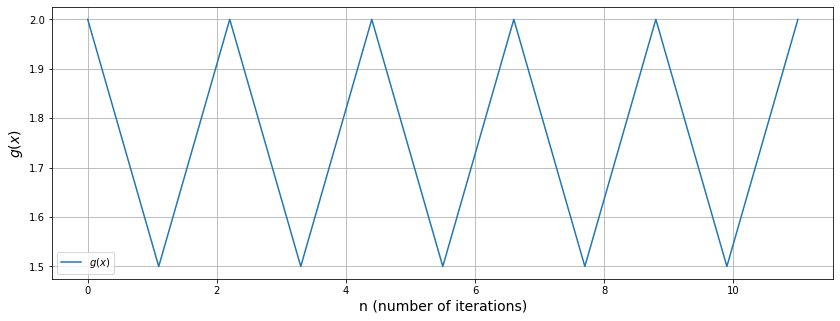

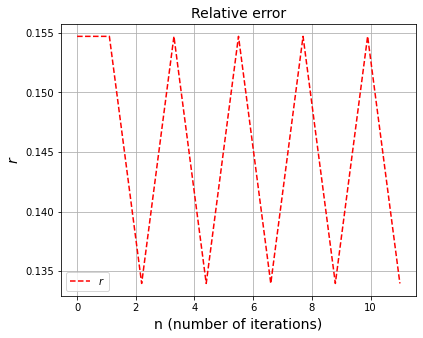

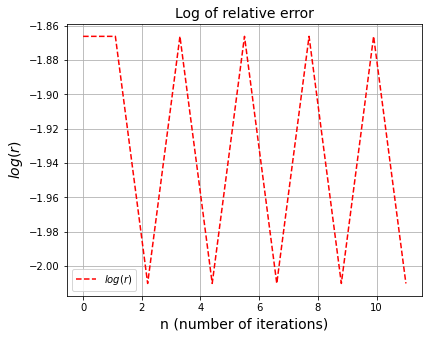

In [17]:
# Place plotting code here if needed

# YOUR CODE HERE
    
def fixed_point(g, x0, M, N):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *M* (float) - Approxiation Number
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
        N: (int) - number of terms in iteration
    """
    f = numpy.sqrt(M)
    x_arr = numpy.empty(N+1)
    x_arr[0] = x0
    rel_err = numpy.empty(N+1)
    rel_err[0]= get_relataive_err(f, x0)
    epsilon = numpy.finfo(float).eps
    for i in range(1, N+1):
        x_arr[i] = g(x_arr[i-1])
        rel_err[i] = get_relataive_err(f, x_arr[i-1])
    return x_arr, rel_err
M = 3
x0 = 2
N = 10
g = lambda x: M/x
ans, rel_err = fixed_point(g, x0, M, N)
print('N iterations: ', N)

print('Nth relative error: ', rel_err[N])
print('Machine epsilon: ', numpy.finfo(float).eps)
x = numpy.linspace(0, N+1, N+1)
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, ans, label='$g(x)$')
# axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$g(x)$",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1)
axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$r$",fontsize=14)
axes.set_title("Relative error",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 2)
axes.plot(x, numpy.log(rel_err), 'r--',label='$log(r)$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$log(r)$",fontsize=14)
axes.set_title("Log of relative error",fontsize=14)
axes.legend()
axes.grid()
plt.show()

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

YOUR ANSWER HERE
$$ g(x) = x - \frac{f}{f^\prime}$$
$$ f(x) = x^2 - M$$
$$ f^\prime(x) = 2x$$
$$x = \sqrt{M}$$
$$g(x) = \sqrt{M} - \frac{(\sqrt{M})^2 - M}{2\sqrt{M}}$$
$$g(x) = \sqrt{M}$$
Since $x = g(x)$  at $x=\sqrt{M}$ therefore  $x=\sqrt{M}$  is a fixed point of $g(x)$

$$ g(x) = x - \frac{f}{f^\prime}$$
$$g(x) = x - \frac{x^2 - M}{2x}$$
$$g(x) = x - \frac{x}{2} + \frac{M}{2x}$$
$$g^\prime(x) = 1 - \frac{1}{2} - \frac{M}{2x^2}$$
$$g^\prime(x) = \frac{1}{2} - \frac{M}{2x^2}$$
$$g''(x) = \frac{M}{4x^3}$$
$$
g(x) = x - \frac{f}{f^\prime} \quad\mathrm{with}\quad x^* = \sqrt{M}
$$
 
$$|g''(x^*)| = |\frac{M}{4(\sqrt{M})^3}| $$
$$|g''(x^*)| = |\frac{1}{4\sqrt{M}}| $$

When $M \geq 1$ then $|g''(x^*)| < 1$
$$
    |e_{k+1}| < \left | \frac{g''(x^*)}{2!} \right | |e_k|^2
$$
$$|\frac{g''(x^*)}{2!}| < 1  $$

Since $|\frac{g''(x^*)}{2!}| < 1$, thus newton method converges for f(x) for x*.

Final x:  1.7320508100147276
x Array:  [2.         1.75       1.73214286 1.73205081]
N iterations:  3
Nth relative error:  [1.54700538e-01 1.03629711e-02 5.31448463e-05 1.41211239e-09]
Machine epsilon:  2.220446049250313e-16


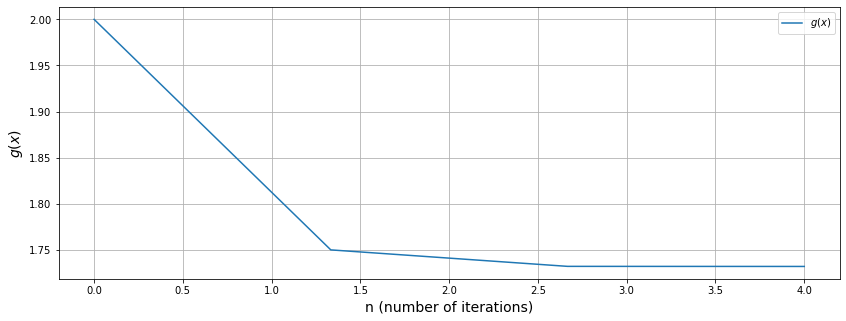

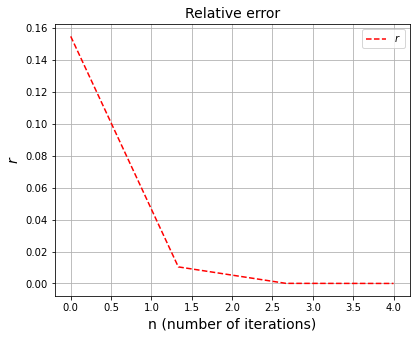

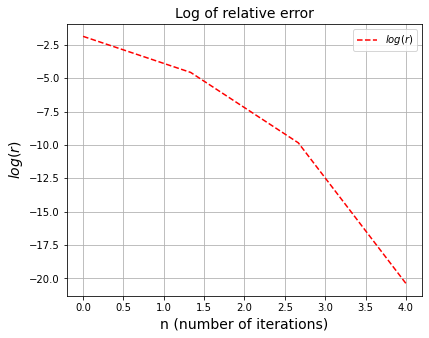

In [7]:
# Place plotting code here if needed

# YOUR CODE HERE
from rootfinding_optimization_schemes import *
M = 3
x0 = 2
f = lambda x: x**2 -M
f_prime = lambda x: 2*x
x_final, x_array = newton(f, f_prime, x0)
N = x_array.size - 1
rel_err = get_relataive_err(numpy.full(x_array.size, numpy.sqrt(M)),x_array)
print('Final x: ', x_final)
print('x Array: ', x_array)
print('N iterations: ', N)
print('Nth relative error: ', rel_err)
print('Machine epsilon: ', numpy.finfo(float).eps)
x = numpy.linspace(0, N+1, N+1)
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, x_array, label='$g(x)$')
# axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$g(x)$",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1)
axes.plot(x, rel_err, 'r--',label='$r$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$r$",fontsize=14)
axes.set_title("Relative error",fontsize=14)
axes.legend()
axes.grid()
fig = plt.figure(figsize=(7,5))
fig.set_figwidth(2. * fig.get_figwidth())
axes = fig.add_subplot(1, 2, 2)
axes.plot(x, numpy.log(rel_err), 'r--',label='$log(r)$')
axes.set_xlabel("n (number of iterations)",fontsize=14)
axes.set_ylabel("$log(r)$",fontsize=14)
axes.set_title("Log of relative error",fontsize=14)
axes.legend()
axes.grid()
plt.show()

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

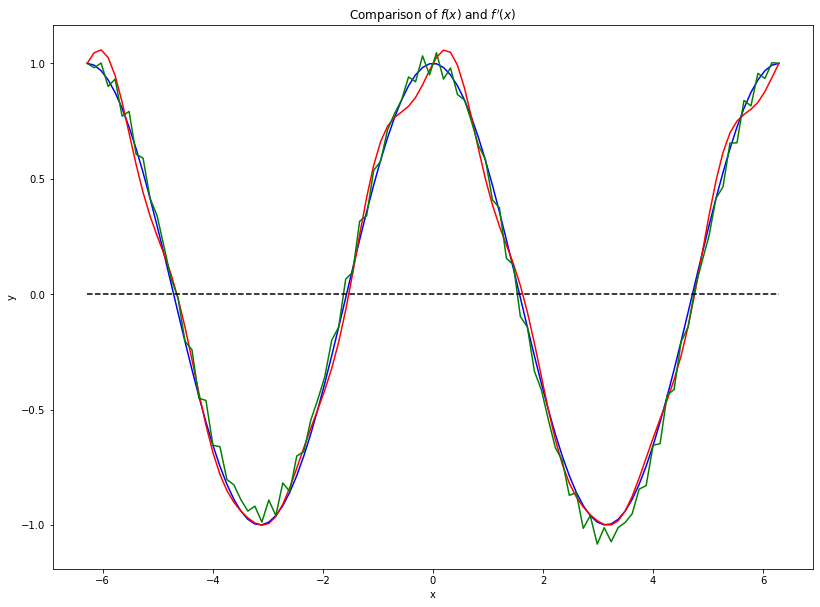

In [18]:
# YOUR CODE HERE
A = 0.05
a = [0, 4, 27]
b = [0, 5, 50]
color = ['b', 'r', 'g']
x = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 100)
fig = plt.figure(figsize=(30,10))
axes = fig.add_subplot(1, 2, 1)
for i in range(len(a)):
    f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
    axes.plot(x, f(x),color[i])
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.plot(x, numpy.zeros(x.shape), 'k--')
plt.show()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [19]:
# YOUR CODE HERE
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    
    c = (a + b)/2.
    ans_array = [c]
    f_a = f(a)
    f_b = f(b)
    N_newton = 0
    N_bisect = 0
    # check bracket
    if numpy.sign(f_a) == numpy.sign(f_b):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")  
    for step in range(1, max_steps + 1):
        if numpy.abs(f(c)) < tol:
            break
        x = c - f(c)/f_prime(c)
        if x < a or x > b:
            N_bisect +=1
            if numpy.sign(f(a)) != numpy.sign(f(c)):
                b = c
            else:
                a = c
            delta_x = b - a
            c = a + delta_x / 2.0
            ans_array.append(c)
        else:
            N_newton +=1
            ans_array.append(x)
            c = x
    print('ans: ', ans_array)
    if step == max_steps:
        warnings.warn('Maximum number of steps exceeded')
    return ans_array[len(ans_array)-1], N_newton, N_bisect

from scipy.optimize import root_scalar
from  rootfinding_optimization_schemes import *
import pandas
from IPython.display import display
# root_scalar?
x0 = 0.2
x1 = 2
A = 0.05
epsilon = numpy.finfo(float).eps

a = [0, 4, 27]
b = [0, 5, 50]
method = ['bisect', 'newton', 'secant', 'newton-safe', 'brentq', 'brenth']
columns = ['Method', 'alpha', 'beta', 'x*','f(x*)', 'N']
data = []
data_1 = []
for meth in method:
#     print('Method: {}'.format(meth))
    for i in range(len(a)):
        f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
        f_prime = lambda x: -numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
        if meth in ('bisect', 'newton', 'secant', 'newton-safe'):
            if meth == 'bisect':
                x, x_arr = bisection(f, x0, x1)
            elif meth == 'newton':
                x, x_arr = newton(f, f_prime, x0)
            elif meth == 'secant':
                x, x_arr = secant(f, x0, x1)
            else: 
                x, X_arr = newtsafe(f, f_prime, x0,x1)
            data.append([meth, a[i], b[i], x, f(x), x_arr.size])
        else:
            sol = root_scalar(f, bracket=[x0, x1], method=meth)
            data.append([meth, a[i], b[i], sol.root, f(sol.root), sol.iterations])
for meth in method:
#     print('Method: {}'.format(meth))
    for i in range(len(a)):
        f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
        f_prime = lambda x: -numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
        if meth in ('bisect', 'newton', 'secant', 'newton-safe'):
            if meth == 'bisect':
                x, x_arr = bisection(f, x0, x1, tol=epsilon)
            elif meth == 'newton':
                x, x_arr = newton(f, f_prime, x0, tol= epsilon)
            elif meth == 'secant':
                x, x_arr = secant(f, x0, x1, tol=epsilon)
            else: 
                x, X_arr = newtsafe(f, f_prime, x0,x1, tol=epsilon)
            data_1.append([meth, a[i], b[i], x, f(x), x_arr.size])
        else:
            sol = root_scalar(f, bracket=[x0, x1], method=meth)
            data.append([meth, a[i], b[i], sol.root, f(sol.root), sol.iterations])
pandas.set_option('display.precision', 16)
roots = pandas.DataFrame(data, columns=columns)
display(roots.sort_values(by=['alpha', 'Method']))

#tol = 2.2 * 10^-16
print('Tolerance: ', epsilon)
roots_1 = pandas.DataFrame(data_1, columns=columns)
display(roots.sort_values(by=['alpha', 'Method']))


/home/jovyan/hw2/rootfinding_optimization_schemes.py:295: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')
/home/jovyan/hw2/rootfinding_optimization_schemes.py:85: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')
/home/jovyan/hw2/rootfinding_optimization_schemes.py:128: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')
/home/jovyan/hw2/rootfinding_optimization_schemes.py:169: RuntimeWarning: invalid value encountered in double_scalars
  x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
/home/jovyan/hw2/rootfinding_optimization_schemes.py:177: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')


,Method,alpha,beta,x*,f(x*),N
0,bisect,0,0,1.5707967758178709,-4.4902297429686792e-07,20
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7
21,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7
18,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7
3,newton,0,0,4.7123889803846897,-1.8369701987210297e-16,5
9,newton-safe,0,0,1.5707963267948988,-2.1592137092929455e-15,9
6,secant,0,0,1.5707963267998242,-4.9275526401563377e-12,6
1,bisect,4,5,1.6304405212402344,1.9620940002601506e-07,18
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8


Tolerance:  2.220446049250313e-16


,Method,alpha,beta,x*,f(x*),N
0,bisect,0,0,1.5707967758178709,-4.4902297429686792e-07,20
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7
21,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7
18,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7
3,newton,0,0,4.7123889803846897,-1.8369701987210297e-16,5
9,newton-safe,0,0,1.5707963267948988,-2.1592137092929455e-15,9
6,secant,0,0,1.5707963267998242,-4.9275526401563377e-12,6
1,bisect,4,5,1.6304405212402344,1.9620940002601506e-07,18
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

Number of Iterations:  5


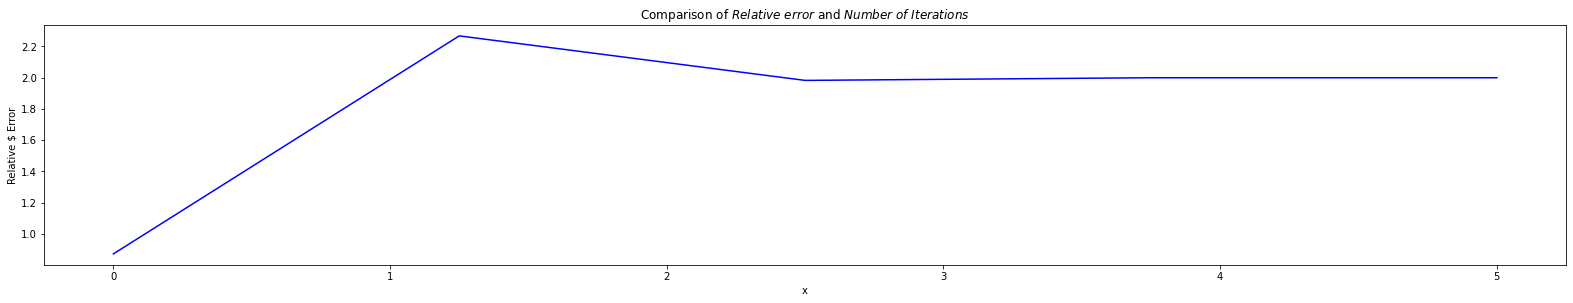

Number of Iterations:  6


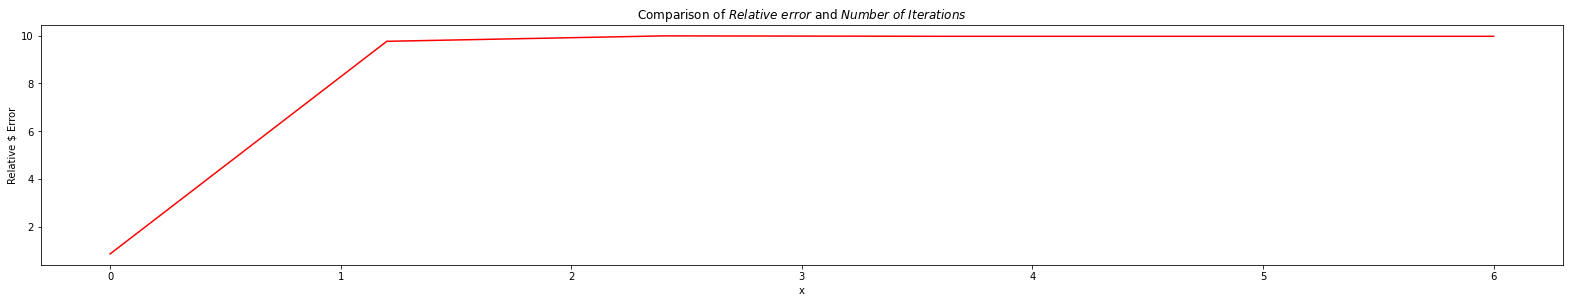

Number of Iterations:  139


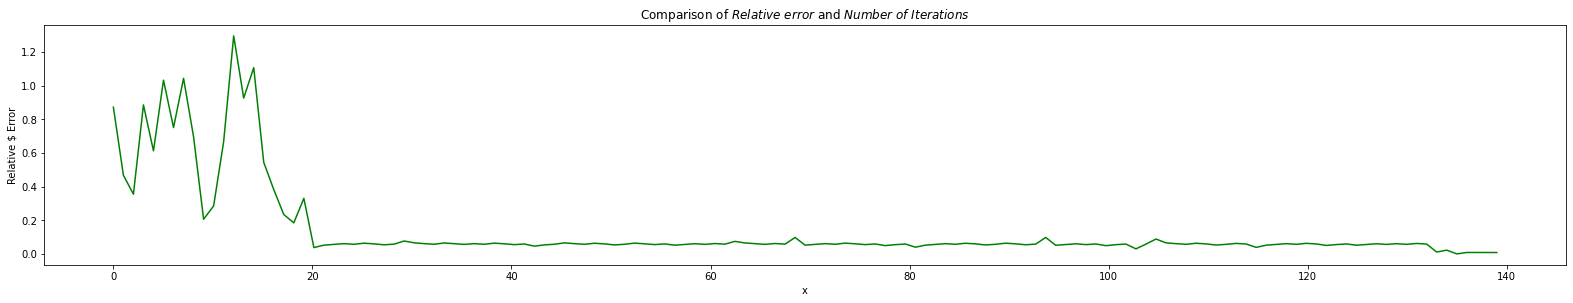

Number of Iterations:  5


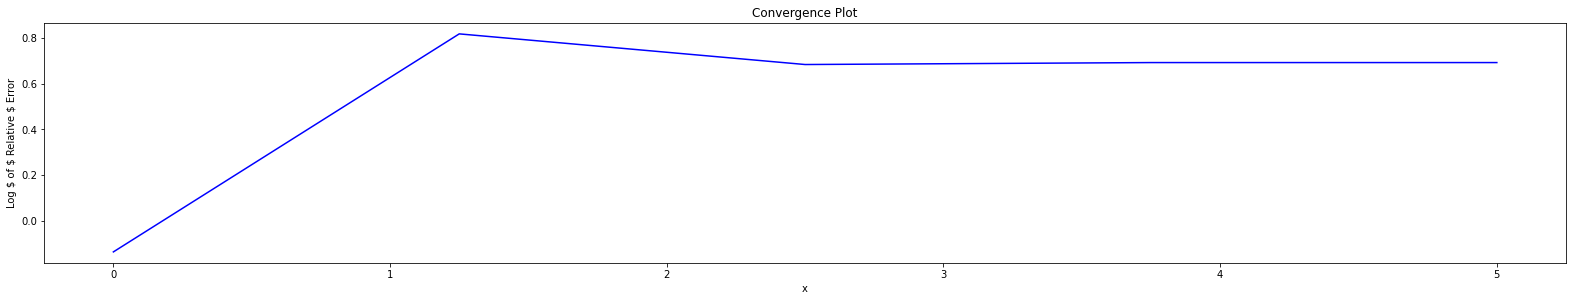

Number of Iterations:  6


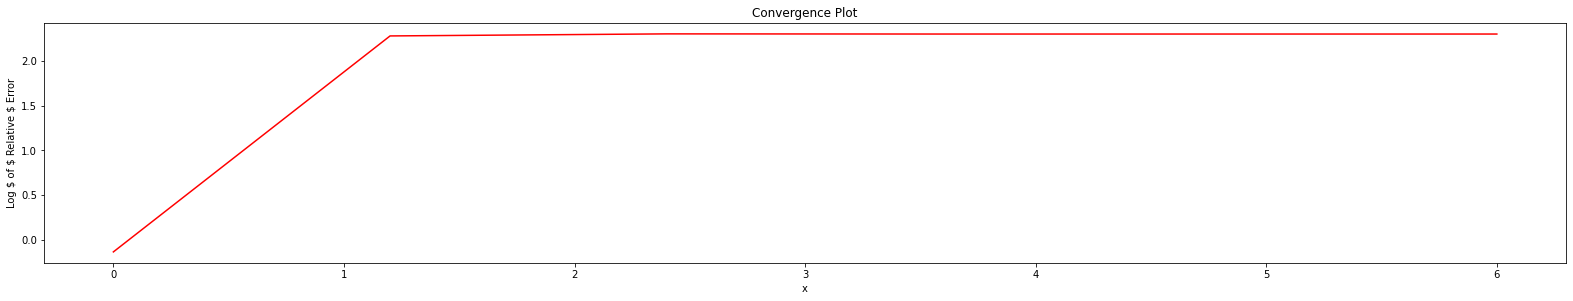

Number of Iterations:  139


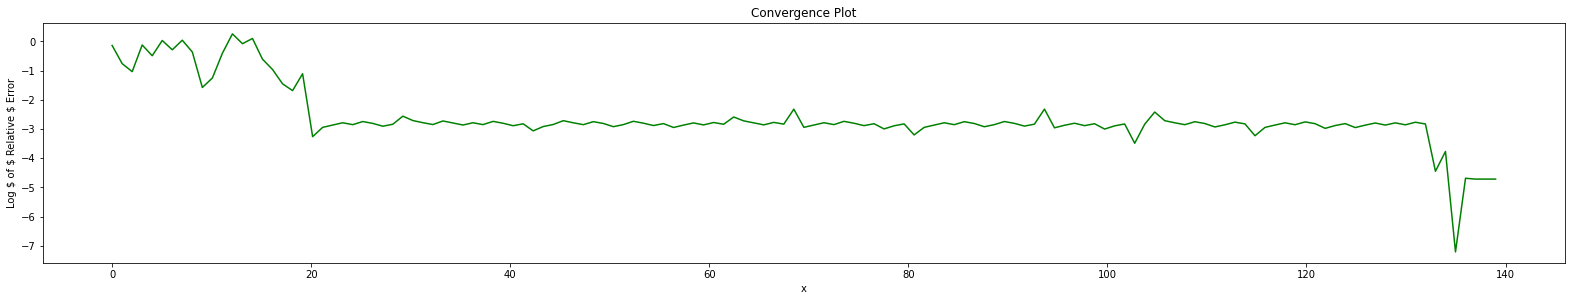

In [11]:
# YOUR CODE HERE
from  rootfinding_optimization_schemes import newton
x0 = 0.2
x1 = 2
A = 0.05
a = [0, 4, 27]
b = [0, 5, 50]
x_original = numpy.pi/2

color = ['b', 'r', 'g']

# axes.append(fig.add_subplot(1, 2, 2))

for i in range(len(a)):
    f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
    f_prime = lambda x: - numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
    x, x_array = newton(f, f_prime, x0,tol=1.e-12)
    relative_errors = get_relataive_err(numpy.full(x_array.size,x_original), x_array)
    n = numpy.linspace(0, x_array.size, x_array.size)
    print('Number of Iterations: ', x_array.size)
    fig = plt.figure(figsize=(30,15))
    fig.set_figwidth(2. * fig.get_figwidth())
    # Relative Error plot
    axes = fig.add_subplot(3, 2, i+1)
    axes.plot(n, relative_errors, color[i])
    axes.set_xlabel("x")
    axes.set_ylabel("Relative $ Error")
    axes.set_title("Comparison of $Relative$ $error$ and $Number$ $of$ $Iterations$")
    plt.show()

for i in range(len(a)):
    f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
    f_prime = lambda x: - numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
    x, x_array = newton(f, f_prime, x0,tol=1.e-12)
    relative_errors = get_relataive_err(numpy.full(x_array.size,x_original), x_array)
    n = numpy.linspace(0, x_array.size, x_array.size)
    print('Number of Iterations: ', x_array.size)
    fig = plt.figure(figsize=(30,15))
    fig.set_figwidth(2. * fig.get_figwidth())
    # Convergence plot for relative error
    axes = fig.add_subplot(3, 2, i+2)
    axes.plot(n, numpy.log(relative_errors), color[i])
    axes.set_xlabel("x")
    axes.set_ylabel("Log $ of $ Relative $ Error")
    axes.set_title("Convergence Plot")
    plt.show()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

In [20]:
from scipy.optimize import root_scalar
from  rootfinding_optimization_schemes import *
import pandas
from IPython.display import display
# root_scalar?
x0 = 0.2
x1 = 2
A = 0.05
epsilon = numpy.finfo(float).eps
a = [0, 4, 27]
b = [0, 5, 50]
method = ['bisect', 'newton', 'secant', 'newton-safe', 'brentq', 'brenth']
columns = ['Method', 'alpha', 'beta', 'x*','f(x*)', 'N', 'Error']
data = []
for meth in method:
#     print('Method: {}'.format(meth))
    for i in range(len(a)):
        f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
        f_prime = lambda x: -numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
        if meth in ('bisect', 'newton', 'secant', 'newton-safe'):
            if meth == 'bisect':
                x, x_arr = bisection(f, x0, x1)
            elif meth == 'newton':
                x, x_arr = newton(f, f_prime, x0)
            elif meth == 'secant':
                x, x_arr = secant(f, x0, x1)
            else: 
                x, X_arr = newtsafe(f, f_prime, x0,x1)
            data.append([meth, a[i], b[i], x, f(x), x_arr.size, numpy.abs(f(x))])
        else:
            sol = root_scalar(f, bracket=[x0, x1], method=meth)
            data.append([meth, a[i], b[i], sol.root, f(sol.root), sol.iterations, numpy.abs(f(sol.root))])
pandas.set_option('display.precision', 16)
roots = pandas.DataFrame(data, columns=columns)

# x0 = 0.1
x00 = 0.1
data_1 = []
for meth in method:
#     print('Method: {}'.format(meth))
    for i in range(len(a)):
        f = lambda x: numpy.cos(x) + A*(numpy.sin(a[i]*x) + numpy.sin(b[i]*x))
        f_prime = lambda x: -numpy.sin(x) + A*(a[i]*numpy.cos(a[i]*x) + b[i]*numpy.cos(b[i]*x))
        if meth in ('bisect', 'newton', 'secant', 'newton-safe'):
            if meth == 'bisect':
                x, x_arr = bisection(f, x00, x1)
            elif meth == 'newton':
                x, x_arr = newton(f, f_prime, x00)
            elif meth == 'secant':
                x, x_arr = secant(f, x00, x1)
            else: 
                x, X_arr = newtsafe(f, f_prime, x00,x1)
            data_1.append([meth, a[i], b[i], x, f(x), x_arr.size, numpy.abs(f(x))])
        else:
            sol = root_scalar(f, bracket=[x00, x1], method=meth)
            data_1.append([meth, a[i], b[i], sol.root, f(sol.root), sol.iterations, numpy.abs(f(sol.root))])
pandas.set_option('display.precision', 16)
roots_1 = pandas.DataFrame(data_1, columns=columns)

for meth in method:
    print('x0: ', x0)
    display(roots[roots.Method == meth])
    print('x0: ', x00)
    display(roots[roots_1.Method == meth])
for a_val in a:
    print('x0: ', x0)
    display(roots[roots.alpha == a_val].sort_values(by=['Error']))
    print('x0: ', x00)
    display(roots[roots_1.alpha == a_val].sort_values(by=['Error']))

x0:  0.2


/home/jovyan/hw2/rootfinding_optimization_schemes.py:295: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')


,Method,alpha,beta,x*,f(x*),N,Error
0,bisect,0,0,1.5707967758178709,-0.0000004490229743,20,0.0000004490229743
1,bisect,4,5,1.6304405212402344,0.0000001962094000,18,0.0000001962094000
2,bisect,27,50,1.5567201137542725,-0.0000000349143904,22,0.0000000349143904


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
0,bisect,0,0,1.5707967758178709,-0.0000004490229743,20,0.0000004490229743
1,bisect,4,5,1.6304405212402344,0.0000001962094000,18,0.0000001962094000
2,bisect,27,50,1.5567201137542725,-0.0000000349143904,22,0.0000000349143904


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
3,newton,0,0,4.7123889803846897,-0.0000000000000002,5,0.0000000000000002
4,newton,4,5,-14.0963262369713522,0.0000000693156074,5,0.0000000693156074
5,newton,27,50,1.5567201035154590,-0.0000000000341306,138,0.0000000000341306


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
3,newton,0,0,4.7123889803846897,-0.0000000000000002,5,0.0000000000000002
4,newton,4,5,-14.0963262369713522,0.0000000693156074,5,0.0000000693156074
5,newton,27,50,1.5567201035154590,-0.0000000000341306,138,0.0000000000341306


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
6,secant,0,0,1.5707963267998242,-0.0000000000049276,6,0.0000000000049276
7,secant,4,5,1.6304406749277849,0.0000000613728729,7,0.0000000613728729
8,secant,27,50,1.5567201023472799,0.0000000039454701,9,0.0000000039454701


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
6,secant,0,0,1.5707963267998242,-0.0000000000049276,6,0.0000000000049276
7,secant,4,5,1.6304406749277849,0.0000000613728729,7,0.0000000613728729
8,secant,27,50,1.5567201023472799,0.0000000039454701,9,0.0000000039454701


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
9,newton-safe,0,0,1.5707963267948988,-0.0000000000000022,9,0.0000000000000022
10,newton-safe,4,5,1.6304407448908182,-0.0000000000086379,9,0.0000000000086379
11,newton-safe,27,50,1.3043239708553898,0.2670507775317941,9,0.2670507775317941


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
9,newton-safe,0,0,1.5707963267948988,-0.0000000000000022,9,0.0000000000000022
10,newton-safe,4,5,1.6304407448908182,-0.0000000000086379,9,0.0000000000086379
11,newton-safe,27,50,1.3043239708553898,0.2670507775317941,9,0.2670507775317941


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
13,brentq,4,5,1.6304407448809730,-2.9837243786801082e-16,8,2.9837243786801082e-16
14,brentq,27,50,1.5567201035054403,-3.1398494915180208e-16,10,3.1398494915180208e-16


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
13,brentq,4,5,1.6304407448809730,-2.9837243786801082e-16,8,2.9837243786801082e-16
14,brentq,27,50,1.5567201035054403,-3.1398494915180208e-16,10,3.1398494915180208e-16


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8,9.0205620750793969e-17
17,brenth,27,50,1.5567201035054401,4.5102810375396984e-16,10,4.5102810375396984e-16


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8,9.0205620750793969e-17
17,brenth,27,50,1.5567201035054401,4.5102810375396984e-16,10,4.5102810375396984e-16


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
3,newton,0,0,4.7123889803846897,-1.8369701987210297e-16,5,1.8369701987210297e-16
9,newton-safe,0,0,1.5707963267948988,-2.1592137092929455e-15,9,2.1592137092929455e-15
6,secant,0,0,1.5707963267998242,-4.9275526401563377e-12,6,4.9275526401563377e-12
0,bisect,0,0,1.5707967758178709,-4.4902297429686792e-07,20,4.4902297429686792e-07


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
12,brentq,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
15,brenth,0,0,1.5707963267948966,6.1232339957367660e-17,7,6.1232339957367660e-17
3,newton,0,0,4.7123889803846897,-1.8369701987210297e-16,5,1.8369701987210297e-16
9,newton-safe,0,0,1.5707963267948988,-2.1592137092929455e-15,9,2.1592137092929455e-15
6,secant,0,0,1.5707963267998242,-4.9275526401563377e-12,6,4.9275526401563377e-12
0,bisect,0,0,1.5707967758178709,-4.4902297429686792e-07,20,4.4902297429686792e-07


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8,9.0205620750793969e-17
13,brentq,4,5,1.6304407448809730,-2.9837243786801082e-16,8,2.9837243786801082e-16
10,newton-safe,4,5,1.6304407448908182,-8.6379445263240484e-12,9,8.6379445263240484e-12
7,secant,4,5,1.6304406749277849,6.1372872874054796e-08,7,6.1372872874054796e-08
4,newton,4,5,-14.0963262369713522,6.9315607385822542e-08,5,6.9315607385822542e-08
1,bisect,4,5,1.6304405212402344,1.9620940002601506e-07,18,1.9620940002601506e-07


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
16,brenth,4,5,1.6304407448809728,-9.0205620750793969e-17,8,9.0205620750793969e-17
13,brentq,4,5,1.6304407448809730,-2.9837243786801082e-16,8,2.9837243786801082e-16
10,newton-safe,4,5,1.6304407448908182,-8.6379445263240484e-12,9,8.6379445263240484e-12
7,secant,4,5,1.6304406749277849,6.1372872874054796e-08,7,6.1372872874054796e-08
4,newton,4,5,-14.0963262369713522,6.9315607385822542e-08,5,6.9315607385822542e-08
1,bisect,4,5,1.6304405212402344,1.9620940002601506e-07,18,1.9620940002601506e-07


x0:  0.2


,Method,alpha,beta,x*,f(x*),N,Error
14,brentq,27,50,1.5567201035054403,-0.0000000000000003,10,0.0000000000000003
17,brenth,27,50,1.5567201035054401,0.0000000000000005,10,0.0000000000000005
5,newton,27,50,1.5567201035154590,-0.0000000000341306,138,0.0000000000341306
8,secant,27,50,1.5567201023472799,0.0000000039454701,9,0.0000000039454701
2,bisect,27,50,1.5567201137542725,-0.0000000349143904,22,0.0000000349143904
11,newton-safe,27,50,1.3043239708553898,0.2670507775317941,9,0.2670507775317941


x0:  0.1


,Method,alpha,beta,x*,f(x*),N,Error
14,brentq,27,50,1.5567201035054403,-0.0000000000000003,10,0.0000000000000003
17,brenth,27,50,1.5567201035054401,0.0000000000000005,10,0.0000000000000005
5,newton,27,50,1.5567201035154590,-0.0000000000341306,138,0.0000000000341306
8,secant,27,50,1.5567201023472799,0.0000000039454701,9,0.0000000039454701
2,bisect,27,50,1.5567201137542725,-0.0000000349143904,22,0.0000000349143904
11,newton-safe,27,50,1.3043239708553898,0.2670507775317941,9,0.2670507775317941


YOUR ANSWER HERE
* Method with closest approximation- brentq, brenth when alpha = 0, beta = 0
* Method with worst approximation- bisect when alpha = 0, beta = 0
* Method with closest approximation- brentq, brenth when alpha = 4, beta = 5
* Method with worst approximation- bisect when alpha = 4, beta = 5
* Method with closest approximation- brentq, brenth when alpha = 27, beta = 50
* Method with worst approximation- newton-safe when alpha = 27, beta = 50
Bisection Method:
* Absolute error of bisection approximation is 0.0000004490229743 for alpha = 0 and beta = 0
* Absolute error of bisection approximation is 0.0000001962094000 for alpha = 4 and beta = 5
* Absolute error of bisection approximation is 0.0000000349143904 for alpha = 27 and beta = 50
* Bisection method improves with increase in value of alpha and beta.
Newton Method:
* Absolute error of newton approximation is 0.0000000000000002 for alpha = 0 and beta = 0
* Absolute error of newton approximation is 0.0000000693156074 for alpha = 4 and beta = 5
* Absolute error of newton approximation is 0.0000000000341306 for alpha = 27 and beta = 50
* Newton method improvement varies with value of alpha and beta.
Secant Method:
* Absolute error of secant approximation is 0.0000000000049276 for alpha = 0 and beta = 0
* Absolute error of secant approximation is 0.0000000613728729 for alpha = 4 and beta = 5
* Absolute error of secant approximation is 0.0000000039454701 for alpha = 27 and beta = 50
* Like newton method, Secant method improvement varies with value of alpha and beta. Though the approximation of Newton method is better than secant for all three sets of alpha and beta.
Newton-safe Method:
* Absolute error of Newton-safe approximation is 0.0000000000000022 for alpha = 0 and beta = 0
* Absolute error of Newton-safe approximation is 0.0000000000086379 for alpha = 4 and beta = 5
* Absolute error of Newton-safe approximation is 0.2670507775317941 for alpha = 27 and beta = 50
* Newton-safe method improvement decreases with increase in value of alpha and beta.
* Newton-safe is better approximation than bisection for alpha = 0,4 and beta = 0, 5.
* Newton method is better approximation than Newton-safe for all sets of alpha and beta
Brentq Method:
* Absolute error of Brentq approximation is 6.1232339957367660e-17 for alpha = 0 and beta = 0
* Absolute error of Brentq approximation is 2.9837243786801082e-16 for alpha = 4 and beta = 5
* Absolute error of Brentq approximation is 3.1398494915180208e-16 for alpha = 27 and beta = 50
* Brentq method improvement decreases with increase in value of alpha and beta.
Brenth Method:
* Absolute error of Brenth approximation is 6.1232339957367660e-17 for alpha = 0 and beta = 0
* Absolute error of Brenth approximation is 9.0205620750793969e-17 for alpha = 4 and beta = 5
* Absolute error of Brenth approximation is 4.5102810375396984e-16 for alpha = 27 and beta = 50
* Brenth method improvement varies with value of alpha and beta.
* Both Brentq and Brenth gives same approximation when alpha = 0 and beta = 0
x0 = 0.1
* Approximation remains same when x0 = 0.1 for all method.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [13]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    
    c = (a + b)/2.
    ans_array = [c]
    f_a = f(a)
    f_b = f(b)
    N_newton = 0
    N_bisect = 0
    # check bracket
    if numpy.sign(f_a) == numpy.sign(f_b):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")  
    for step in range(1, max_steps + 1):
        if numpy.abs(f(c)) < tol:
            break
        x = c - f(c)/f_prime(c)
        if x < a or x > b:
            N_bisect +=1
            if numpy.sign(f(a)) != numpy.sign(f(c)):
                b = c
            else:
                a = c
            delta_x = b - a
            c = a + delta_x / 2.0
            ans_array.append(c)
        else:
            N_newton +=1
            ans_array.append(x)
            c = x
    print('ans: ', ans_array)
    if step == max_steps:
        warnings.warn('Maximum number of steps exceeded')
    return ans_array[len(ans_array)-1], N_newton, N_bisect

In [14]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


ans:  [0.9797136714876995, 1.2970594580385149, 1.2718845448662068, 1.27194847295657]
Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

ans:  [1.5524045309617036, 0.42097545828822525, 0.9866899946249644, 1.081642097866884, 1.088452555133303, 1.0884990113244402]
Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

ans:  [1.691591211470163, 0.5839927109932952, 1.2466550491528303, 1.0665512443524072, 1.1084442215609085, 1.1106080637524167, 1.1106142646362411]
Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

ans:  [0.9856341579538752, 1.366218219614229, 1.3247278595116878, 1.3248590962279

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


YOUR ANSWER HERE

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

$$
    \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 
$$
\left| \frac{(n+1)log(x)} {log(n+1)!} \right|  \approx log(\epsilon)_{mach}
$$
Using Stirling's approximation $\log(n!) \approx n \log n − n$

$$(n+1)log(x) - (n+1)log(n+1) + (n+1)  = log(\epsilon)_{mach}$$

$$(n+1)(log(x) - log(n+1) + 1)  = log(\epsilon)_{mach}$$

$$log(x) - log(n+1) + 1  = \frac{log(\epsilon)_{mach}}{n+1}$$

$$log(x) - log(n+1) + 1  - \frac{log(\epsilon)_{mach}}{n+1} = 0$$

Thus, $$f(x) = log(x) - log(n+1) + 1  - \frac{log(\epsilon)_{mach}}{n+1}$$

In [15]:
from scipy.special import factorial
import math

def Tn_exp(x):
    """ Write a decent description here
    
    Function to calculate e^x using Taylor series approximation about x0 = 0
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """
#     assert(isinstance(x,float))
    
    inv = False
    if x<0:
        x = abs(x)
        inv = True
        
    MAX_N = int(numpy.ceil(3*x))+50
    
    p = []
    for n in range(MAX_N + 1):
        p.append(1 / factorial(n))    
    p.reverse()    
    
    Tn = p[0]
    for coefficient in p[1:]:
        Tn = Tn * x + coefficient
        
    if inv:
        Tn = 1/Tn                      
    
    return Tn, MAX_N

def get_relataive_err(f, F):
    if type(f) == numpy.ndarray:
        e = numpy.empty(f.size)
        r = numpy.empty(f.size)
        for i in range(f.size):
            e[i] = numpy.abs(f[i] - F[i])
            r[i] = e[i]/numpy.abs(f[i])
    else:
        e = numpy.abs(F-f)
        r = e/numpy.abs(f)
    return r

In [16]:
# YOUR CODE HERE
from  rootfinding_optimization_schemes import *
from scipy.optimize import root_scalar
x_list = [0.1, 1., 10., 100., 709., 1000]
epsilon = numpy.finfo(float).eps
# print(numpy.log(epsilon))
e = numpy.exp(1)
data = []
n0 = 1
n1 = 10000
method = ['newton', 'brentq', 'brenth']
columns = ['Method', 'x', 'n from Tn','n*','e*x','f(n*)', 'Relative error bt n*, e*x', 
           'Relative error bt n*, n from Tn','N']
for i in range(len(x_list)):
    f = lambda n: 1 + numpy.log(x_list[i]) - numpy.log(n+1) - numpy.log(epsilon)/(n+1)
    f_prime = lambda n: -n/(n+1)**2
    ans, N = Tn_exp(x_list[i])
    for meth in method:
        if meth == 'newton':
            x_n, x_array = newton(f, f_prime, 1, tol=epsilon)
            data.append([meth, x_list[i], N, x_n, e*x_list[i], f(x_n), 
                         get_relataive_err(x_n, e*x_list[i]),
                         get_relataive_err(sol.root, N), len(x_array)])
        else:
            sol = root_scalar(f, bracket=[n0, n1], method=meth)
            data.append([meth, x_list[i], N, sol.root, e*x_list[i], f(sol.root),
                         get_relataive_err(sol.root, e*x_list[i]),
                         get_relataive_err(sol.root, N), sol.iterations])
pandas.set_option('display.precision', 16)
roots = pandas.DataFrame(data, columns=columns)
display(roots.sort_values(by=['x', 'Method']))

<ipython-input-16-27241358a24b>:15: RuntimeWarning: invalid value encountered in log
  f = lambda n: 1 + numpy.log(x_list[i]) - numpy.log(n+1) - numpy.log(epsilon)/(n+1)
/home/jovyan/hw2/rootfinding_optimization_schemes.py:128: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')


,Method,x,n from Tn,n*,e*x,f(n*),"Relative error bt n*, e*x","Relative error bt n*, n from Tn",N
2,brenth,0.1,51,8.9982522636131304,0.2718281828459045,0.0000000000000000e+00,0.9697910021988252,4.6677673070171979,16
1,brentq,0.1,51,8.9982522636131304,0.2718281828459045,0.0000000000000000e+00,0.9697910021988252,4.6677673070171979,18
0,newton,0.1,51,NaN,0.2718281828459045,NaN,NaN,43.4514849431948988,201
5,brenth,1.0,53,17.6932601798698315,2.7182818284590451,0.0000000000000000e+00,0.8463662546740980,1.9954909079051319,16
4,brentq,1.0,53,17.6932601798698315,2.7182818284590451,0.0000000000000000e+00,0.8463662546740980,1.9954909079051319,17
3,newton,1.0,53,NaN,2.7182818284590451,NaN,NaN,4.8900326916061081,201
8,brenth,10.0,80,52.3920028215735627,27.1828182845904500,2.2204460492503131e-16,0.4811647423145021,0.5269505972590579,16
7,brentq,10.0,80,52.3920028215735840,27.1828182845904500,-4.4408920985006262e-16,0.4811647423145023,0.5269505972590574,16
6,newton,10.0,80,52.3920028215735343,27.1828182845904500,9.9920072216264089e-16,0.4811647423145018,3.5214957100454822,201
11,brenth,100.0,350,304.8289018356015276,271.8281828459045073,-6.9388939039072284e-17,0.1082598099818460,0.1481850897089800,14
